In [1]:
import tensorflow
from tensorflow import keras
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
x_train[0][1]

array([[255, 255, 255],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [252, 251, 250],
       [253, 246, 231],
       [218, 200, 179],
       [111,  90,  81],
       [163, 155, 155],
       [255, 255, 255],
       [255, 254, 254],
       [253, 252, 253],
       [253, 254, 253],
       [252, 254, 254],
       [247, 252, 253],
       [216, 227, 222],
       [198, 211, 194],
       [170, 176, 150],
       [161, 168, 130],
       [146, 154, 113]], dtype=uint8)

In [5]:
x_train=x_train/255.0
x_test=x_test/255.0

In [6]:
y_train[0]

array([19])

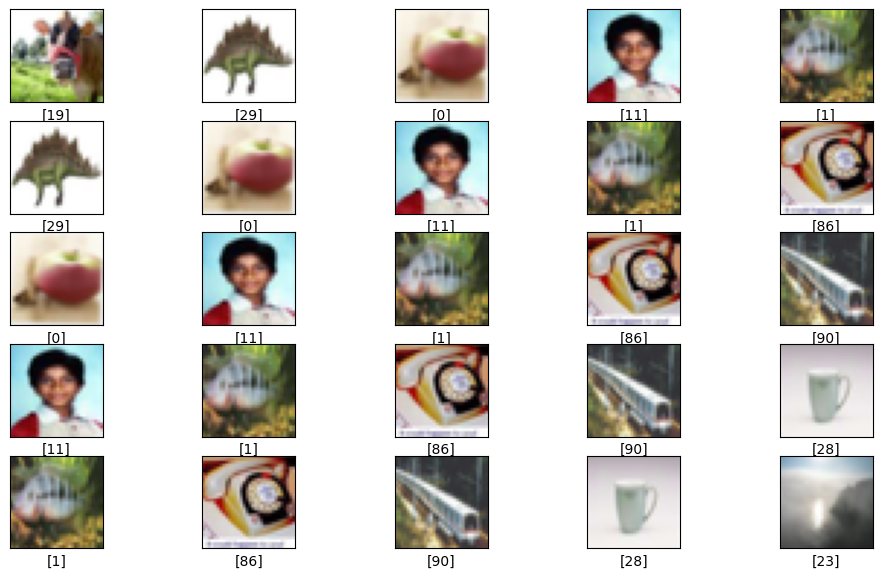

In [7]:
fig,ax = plt.subplots(5, 5, figsize=(12,7))
for i in range(5):
  for j in range(5):
    ax[i,j].imshow(x_train[i+j])
    ax[i,j].set_xlabel(y_train[i+j])
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])

In [8]:
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [74]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))

model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_18 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_19 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                      

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
datagen=ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.5,
                           fill_mode='reflect', horizontal_flip=True, zoom_range=[0.9, 1.3])

datagen.fit(x_train)

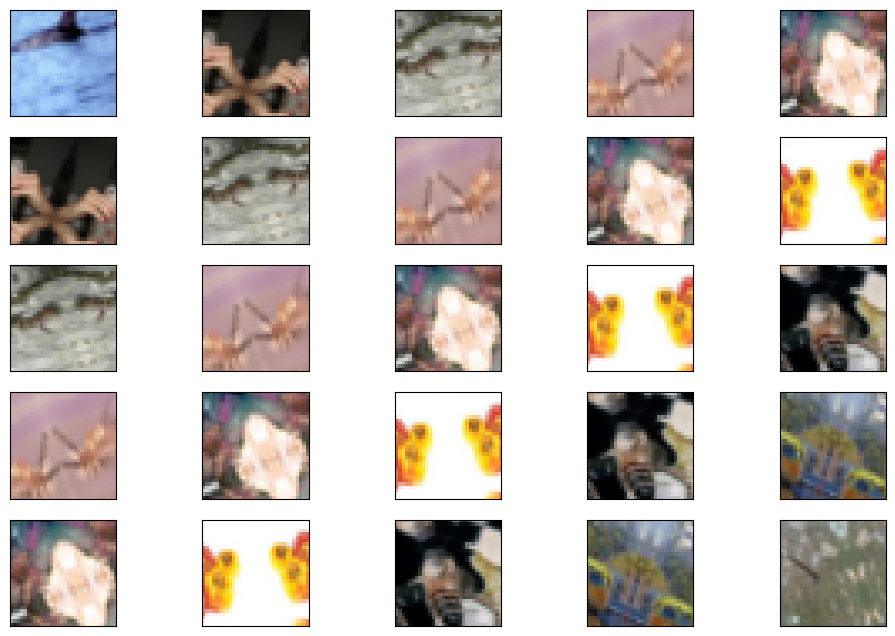

In [77]:
import matplotlib.pyplot as plt

# Get a batch of augmented images
augmented_images, labels = next(datagen.flow(x_train, y_train))

fig, ax = plt.subplots(5,5, figsize=(12,8))
for i in range(5):
  for j in range(5):
    ax[i,j].imshow(augmented_images[i+j])
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    # ax[i,j].set_xlabel(labels[i][j])

In [78]:
hist=model.fit(datagen.flow(x_train, y_train, batch_size=64), validation_data=(x_test,y_test), epochs=25)

Epoch 1/25
782/782 [==============================] - 38s 47ms/step - loss: 3.9900 - accuracy: 0.0925 - val_loss: 3.6178 - val_accuracy: 0.1398
Epoch 2/25
782/782 [==============================] - 37s 47ms/step - loss: 3.5971 - accuracy: 0.1471 - val_loss: 3.5293 - val_accuracy: 0.1585
Epoch 3/25
782/782 [==============================] - 37s 47ms/step - loss: 3.4227 - accuracy: 0.1802 - val_loss: 3.1556 - val_accuracy: 0.2248
Epoch 4/25
782/782 [==============================] - 37s 48ms/step - loss: 3.3021 - accuracy: 0.2013 - val_loss: 3.3880 - val_accuracy: 0.1945
Epoch 5/25
782/782 [==============================] - 37s 47ms/step - loss: 3.2092 - accuracy: 0.2176 - val_loss: 3.0227 - val_accuracy: 0.2511
Epoch 6/25
782/782 [==============================] - 37s 48ms/step - loss: 3.1415 - accuracy: 0.2304 - val_loss: 2.8139 - val_accuracy: 0.2889
Epoch 7/25
782/782 [==============================] - 37s 47ms/step - loss: 3.0838 - accuracy: 0.2417 - val_loss: 2.7952 - val_accuracy: